# Logistic Regression Project 


GOAL: To create a Classification Model that can predict whether or not a person has presence of heart disease based on the person's physical features

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

array([1, 0])

### Exploratory Data Analysis and Visualization

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [16]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

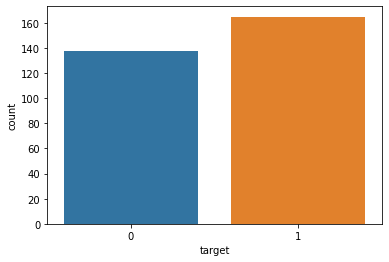

In [15]:
sns.countplot(data=df,x='target')

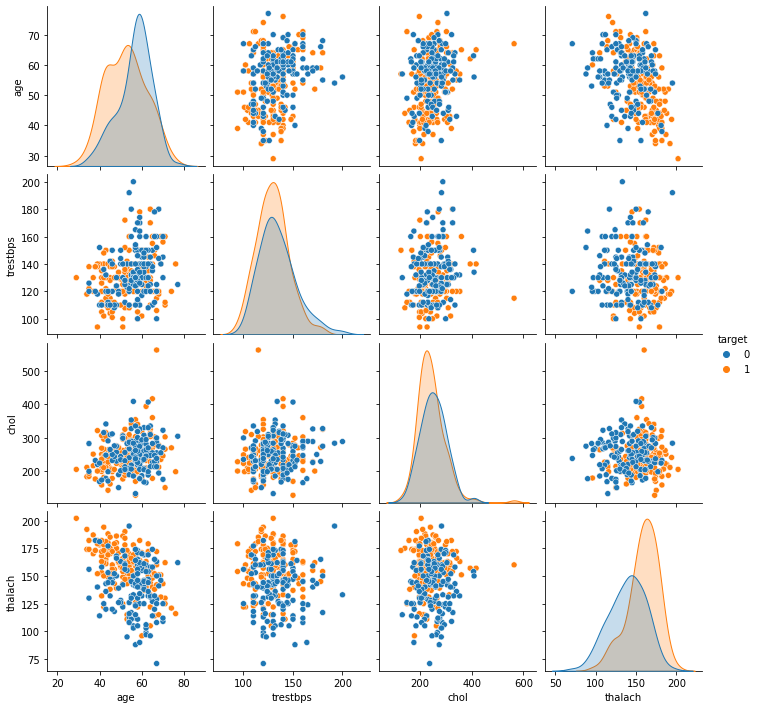

In [19]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

<AxesSubplot:>

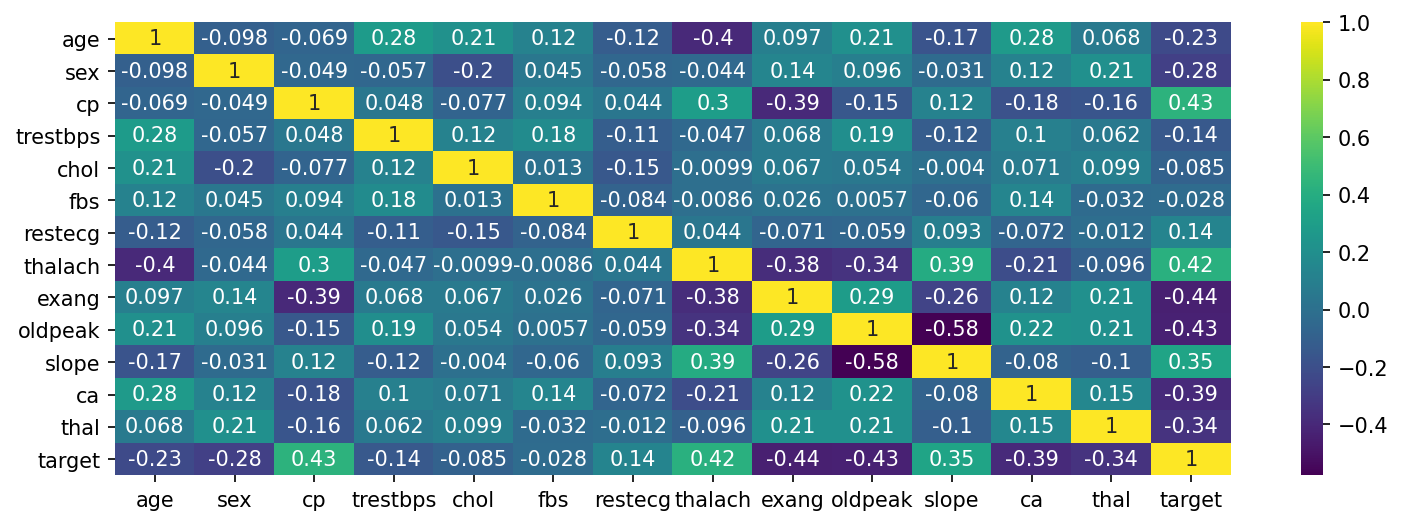

In [99]:
plt.figure(figsize=(12,4),dpi=150)
sns.heatmap(df.corr(),annot=True,cmap='viridis')

----
----

### Machine Learning 

In [27]:
X = df.drop('target',axis=1)

In [28]:
y = df['target']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
scaled_X_train = scaler.fit_transform(X_train)

In [34]:
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

In [24]:
# Create a Logistic Regression model & use Cross-Validation to find a well-performing C value for the 
# hyper-parameter search.

In [38]:
from sklearn.linear_model import LogisticRegressionCV

In [45]:
log_model = LogisticRegressionCV()

In [46]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [101]:
# optimal Parameter - C Value
# log_model.Cs_ - all C values that was checked
log_model.C_

array([0.04641589])

In [48]:
# Coeffecients
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

In [ ]:
# Visualization of the coefficients by using a barplot of their values.

In [61]:
coefs = pd.Series(log_model.coef_[0],index=X.columns).sort_values()

In [62]:
coefs

ca         -0.497358
sex        -0.394602
thal       -0.374486
oldpeak    -0.352386
exang      -0.334382
trestbps   -0.138502
age        -0.096212
chol       -0.088305
fbs         0.024873
restecg     0.080838
slope       0.251010
thalach     0.299141
cp          0.535347
dtype: float64

<AxesSubplot:>

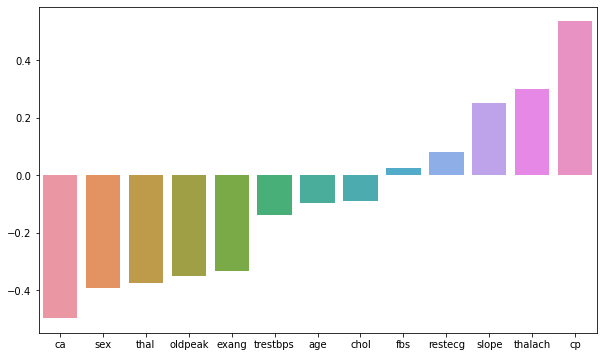

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values)

---------

## Model Performance Evaluation

In [66]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report

In [68]:
y_pred = log_model.predict(scaled_X_test)

In [69]:
# Confusion Matrix Array
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]])

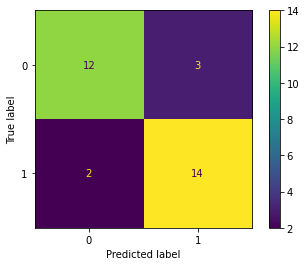

In [70]:
# Confusion Matrix Plot
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [71]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves

In [72]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

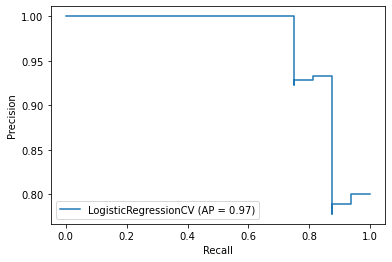

In [73]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

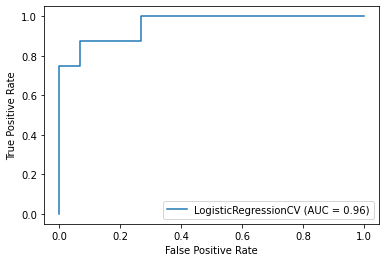

In [74]:
plot_roc_curve(log_model,scaled_X_test,y_test)

### Test

In [83]:
# patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. , 3.2,   1. ,   2. ,   2. ]]

In [92]:
patient = [[ 48. ,   0. ,   2. , 130. , 275. ,   0. ,   1. , 139. ,   0. , 0.2,   2. ,   0. ,   2. ]]

In [97]:
# X_test.iloc[-1]

In [98]:
# y_test.iloc[-1]

In [95]:
# EXPECTED PREDICTION
log_model.predict(patient)

array([0])

In [96]:
# EXPECTED PROBABILITY PER CLASS (Basically model should be extremely sure its in the 0 class)
log_model.predict_proba(patient)

array([[0.98646, 0.01354]])